WARNING!!

You will see a lot of bar plots. Two reasons:

 1. I am a big fan of bar plots.
 2. I am exploring ggplot2  for making bar plots

In [1]:
# This R environment comes with all of CRAN preinstalled, as well as many other helpful packages
# The environment is defined by the kaggle/rstats docker image: https://github.com/kaggle/docker-rstats
# For example, here's several helpful packages to load in 

library(ggplot2) # Data visualization
library(reshape)
library(readr) # CSV file I/O, e.g. the read_csv function

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

system("ls ../input")

# Any results you write to the current directory are saved as output.

In [2]:
df <- read.csv("../input/HR_comma_sep.csv")
# Look at the data
head(df)
summary(df)
str(df)
sum(is.na(df))

satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0.38,0.53,2,157,3,0,1,0,sales,low
0.80,0.86,5,262,6,0,1,0,sales,medium
0.11,0.88,7,272,4,0,1,0,sales,medium
0.72,0.87,5,223,5,0,1,0,sales,low
0.37,0.52,2,159,3,0,1,0,sales,low
0.41,0.50,2,153,3,0,1,0,sales,low


 satisfaction_level last_evaluation  number_project  average_montly_hours
 Min.   :0.0900     Min.   :0.3600   Min.   :2.000   Min.   : 96.0       
 1st Qu.:0.4400     1st Qu.:0.5600   1st Qu.:3.000   1st Qu.:156.0       
 Median :0.6400     Median :0.7200   Median :4.000   Median :200.0       
 Mean   :0.6128     Mean   :0.7161   Mean   :3.803   Mean   :201.1       
 3rd Qu.:0.8200     3rd Qu.:0.8700   3rd Qu.:5.000   3rd Qu.:245.0       
 Max.   :1.0000     Max.   :1.0000   Max.   :7.000   Max.   :310.0       
                                                                         
 time_spend_company Work_accident         left        promotion_last_5years
 Min.   : 2.000     Min.   :0.0000   Min.   :0.0000   Min.   :0.00000      
 1st Qu.: 3.000     1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000      
 Median : 3.000     Median :0.0000   Median :0.0000   Median :0.00000      
 Mean   : 3.498     Mean   :0.1446   Mean   :0.2381   Mean   :0.02127      
 3rd Qu.: 4.000     3rd Qu.:

'data.frame':	14999 obs. of  10 variables:
 $ satisfaction_level   : num  0.38 0.8 0.11 0.72 0.37 0.41 0.1 0.92 0.89 0.42 ...
 $ last_evaluation      : num  0.53 0.86 0.88 0.87 0.52 0.5 0.77 0.85 1 0.53 ...
 $ number_project       : int  2 5 7 5 2 2 6 5 5 2 ...
 $ average_montly_hours : int  157 262 272 223 159 153 247 259 224 142 ...
 $ time_spend_company   : int  3 6 4 5 3 3 4 5 5 3 ...
 $ Work_accident        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ left                 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ promotion_last_5years: int  0 0 0 0 0 0 0 0 0 0 ...
 $ sales                : Factor w/ 10 levels "accounting","hr",..: 8 8 8 8 8 8 8 8 8 8 ...
 $ salary               : Factor w/ 3 levels "high","low","medium": 2 3 3 2 2 2 2 2 2 2 ...


[1] 0

In [3]:
# Thankfully there is no missing data, we can continue with our exploration
# Create some plots to understand the data better

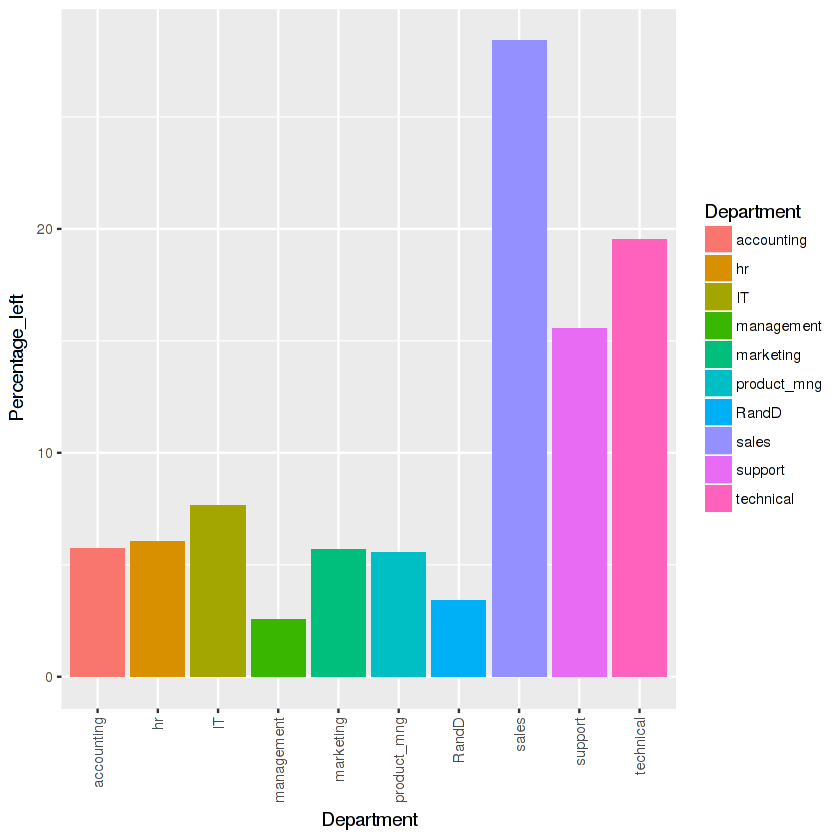

In [4]:
# Group column 'left' by 'sales' and find the percentage of people belonging to each group
plot1 <- aggregate(list(Percentage_left=df$left), list(Department=df$sales), function (x) sum(x)/sum(df$left)*100)
ggplot(plot1, aes(Department, Percentage_left, fill = Department)) + geom_bar(stat="identity") + 
		theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5))

In [5]:
# We see that the highest number of people who left belong to Sales department (28.3%)
# followed by technical (19.5%) and support (15.5%)

sum(df$left[df$sales=='sales'])/length(df$left[df$sales=='sales'])*100
sum(df$left[df$sales=='technical'])/length(df$left[df$sales=='technical'])*100
sum(df$left[df$sales=='support'])/length(df$left[df$sales=='support'])*100

[1] 24.49275

[1] 25.625

[1] 24.89906

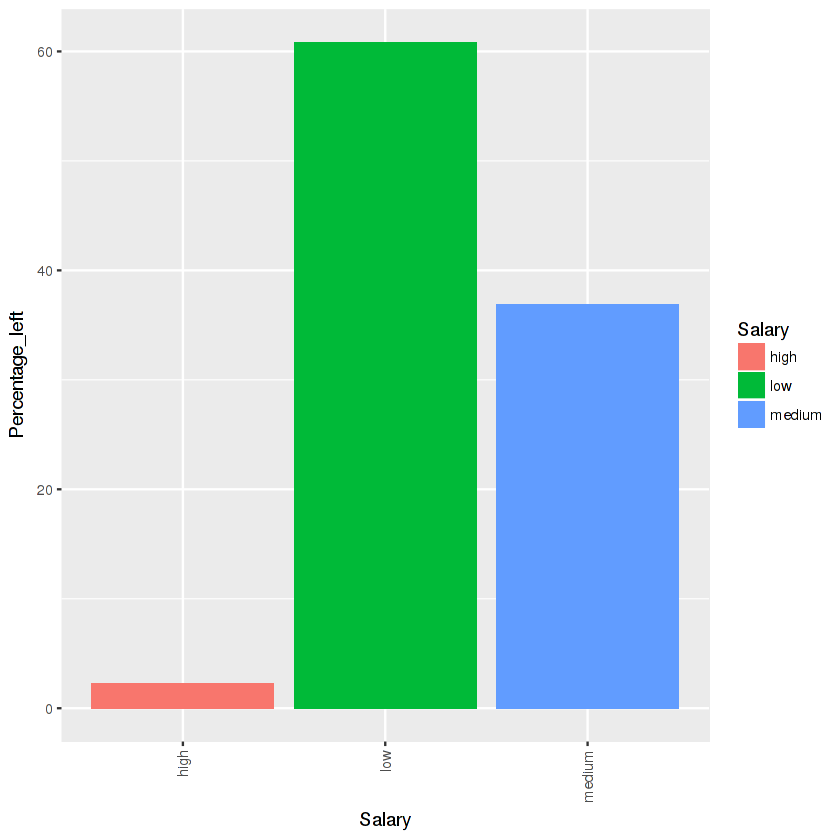

In [6]:
# 24.5% from sales, 25.6% from techical and 24.9% from support left.
# let's explore other variables too
# Group column 'left' by 'salary' and find the percentage of people belonging to each group
plot2 <- aggregate(list(Percentage_left=df$left), list(Salary=df$salary), function (x) sum(x)/sum(df$left)*100)
ggplot(plot2, aes(Salary, Percentage_left, fill = Salary)) + geom_bar(stat="identity") + 
		theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5))

In [7]:
# 60.8% of people who left had low salary

sum(df$left[df$salary=='low'])/length(df$left[df$salary=='low'])*100

[1] 29.68835

In [8]:
# 29.7% of people who have low salary, left
# Low salary could be one of the reasons why people are leaving

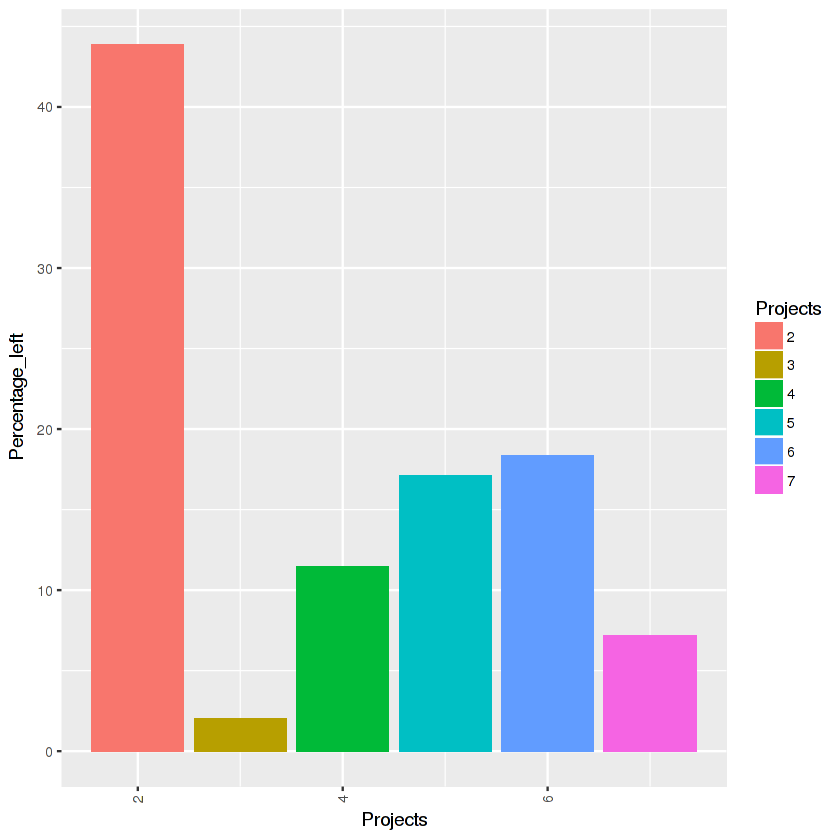

In [9]:
# Group column 'left' by 'number_projects' and find the percentage of people belonging to each group
plot3 <- aggregate(list(Percentage_left=df$left), list(Projects=df$number_project), function (x) sum(x)/sum(df$left)*100)
ggplot(plot3, aes(Projects, Percentage_left, fill = factor(Projects))) + geom_bar(stat="identity") + 
		labs(fill="Projects")  + theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5))

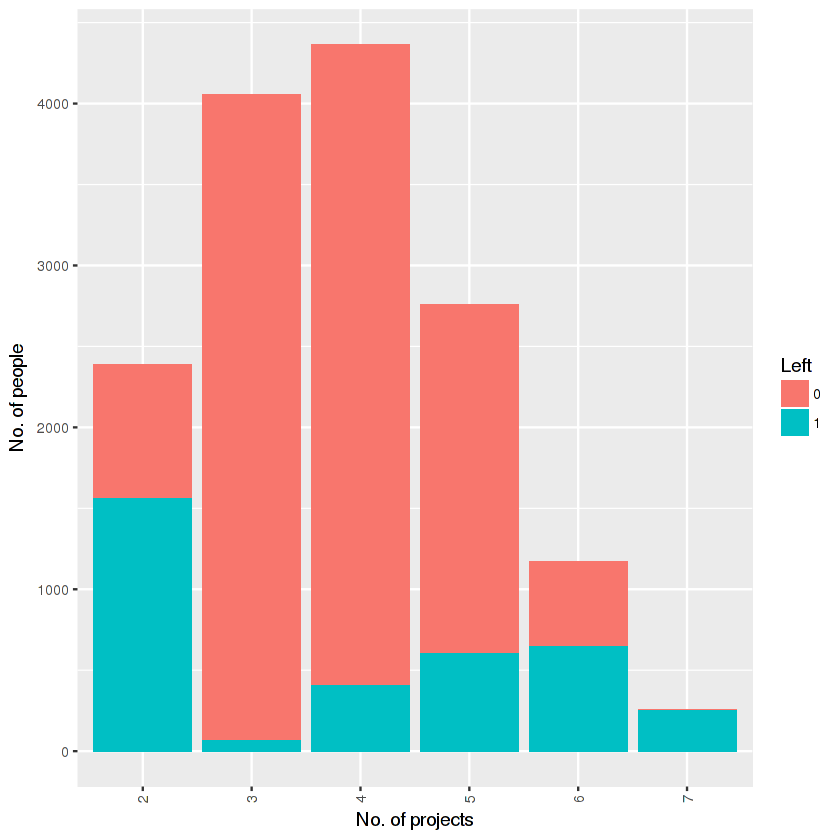

In [10]:
# 43.9% of people left after just two projects, why is that? Lets look at another plot to get more insights.
plot4 <- data.frame(table(df$left, df$number_project))
ggplot(plot4, aes(Var2, Freq, fill=Var1)) + geom_bar(stat="identity") + xlab("No. of projects") +
ylab("No. of people") + labs(fill="Left") + theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5))

In [11]:
# From the above graph, looks like chances of people staying with 2 projects is slim, 
# but what is happening at the last column? All the people who were working on 7 projects have left.

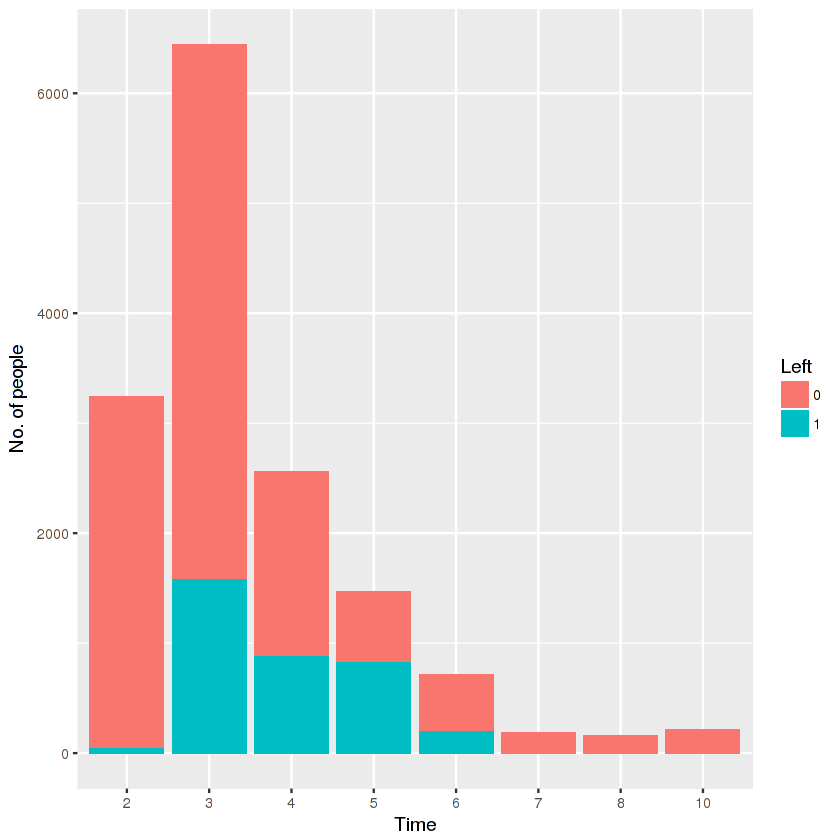

In [12]:
plot5 <- data.frame(table(df$left, df$time_spend_company))
ggplot(plot5, aes(Var2, Freq, fill=Var1)) + geom_bar(stat="identity") + xlab("Time") +ylab("No. of people") + labs(fill="Left")

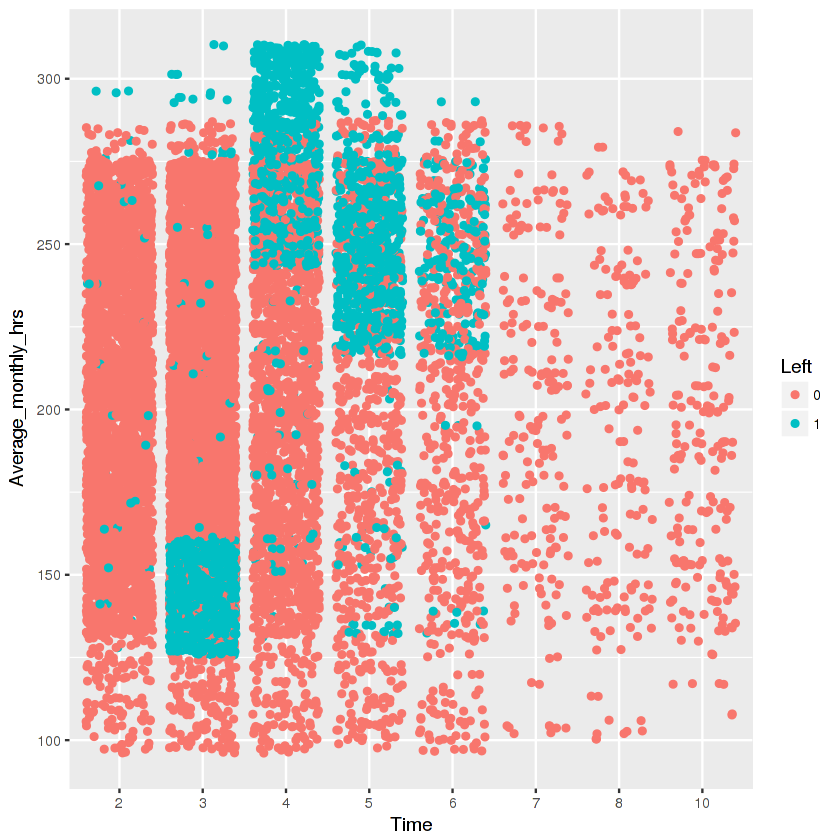

In [13]:
# People who have spent a considerable amount of time have not left, as have the recent joinees.
# Enough of bar plots.... let us make some scatter plots!
ggplot(df, aes(factor(time_spend_company), average_montly_hours)) +
		geom_point(aes(color=factor(df$left)), position = "jitter") + 
		xlab("Time") + ylab("Average_monthly_hrs") + labs(color="Left")

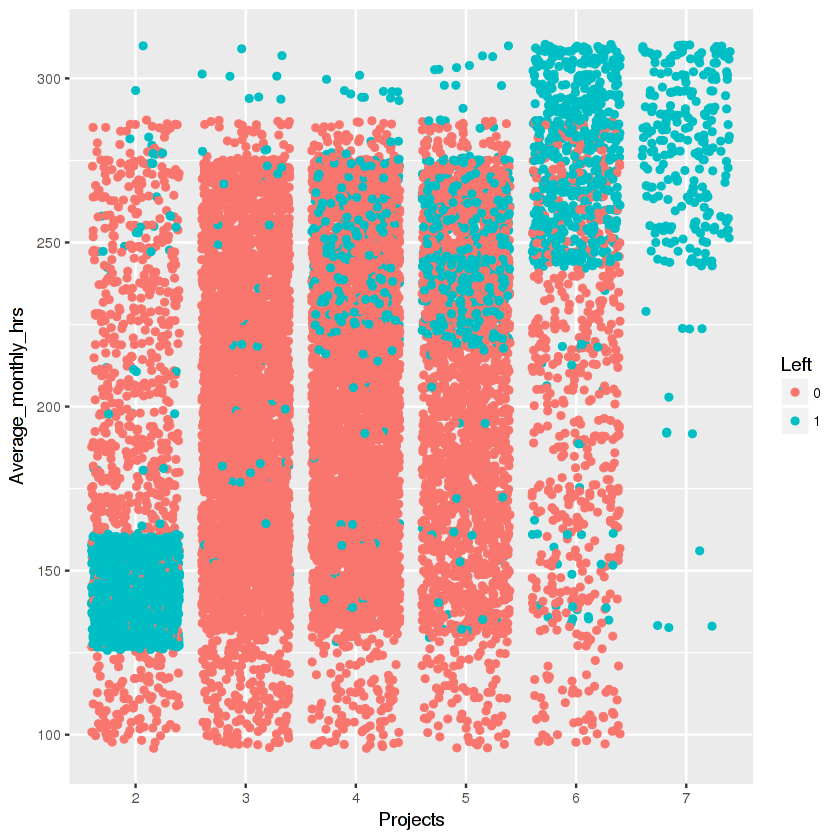

In [14]:
ggplot(df, aes(factor(number_project), average_montly_hours)) + 
		geom_point(aes(color=factor(df$left)), position = "jitter") + 
		xlab("Projects") + ylab("Average_monthly_hrs") + labs(color="Left")

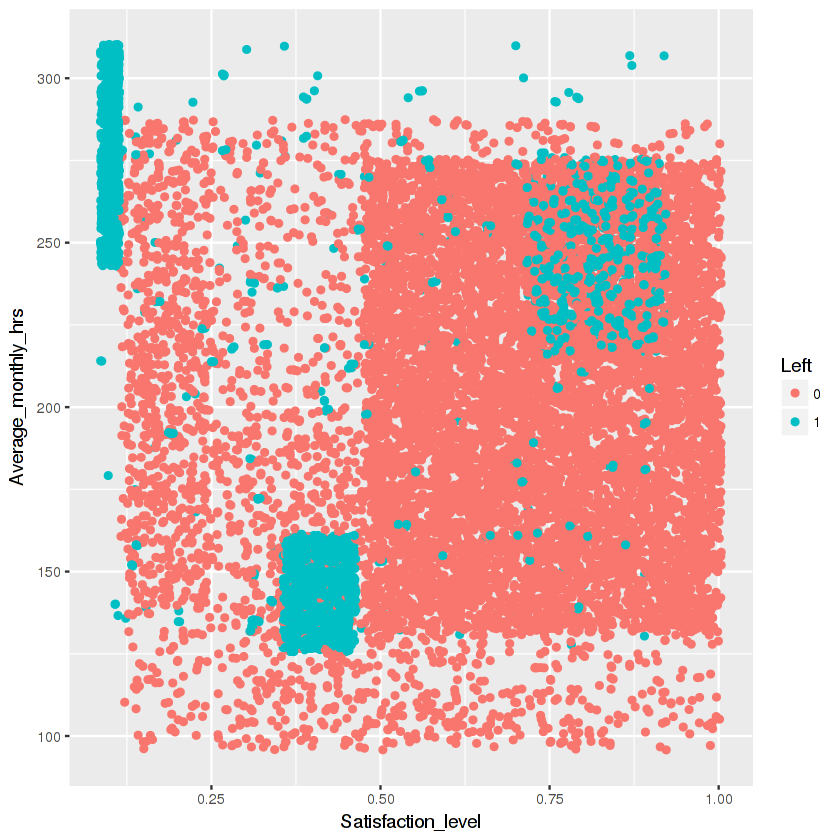

In [15]:
ggplot(df, aes(satisfaction_level, average_montly_hours)) +
		geom_point(aes(color=factor(df$left)), position = 'jitter') + 
		xlab("Satisfaction_level") + ylab("Average_monthly_hrs") + labs(color="Left")

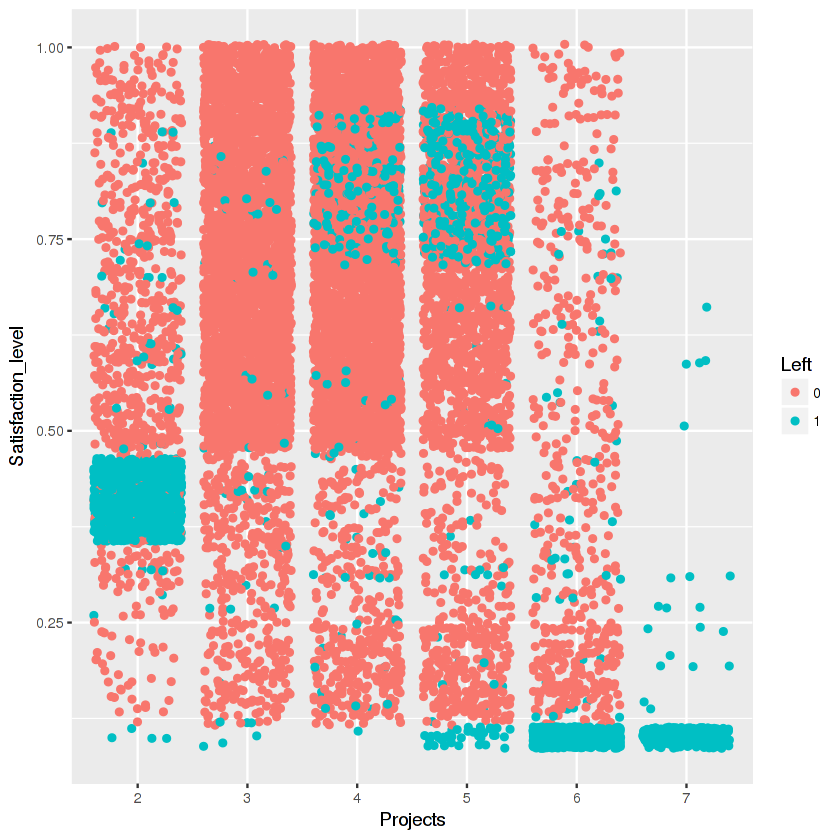

In [16]:
ggplot(df, aes(factor(number_project), satisfaction_level)) +
		geom_point(aes(color=factor(df$left)), position = 'jitter') + 
		xlab("Projects") + ylab("Satisfaction_level") + labs(color="Left")

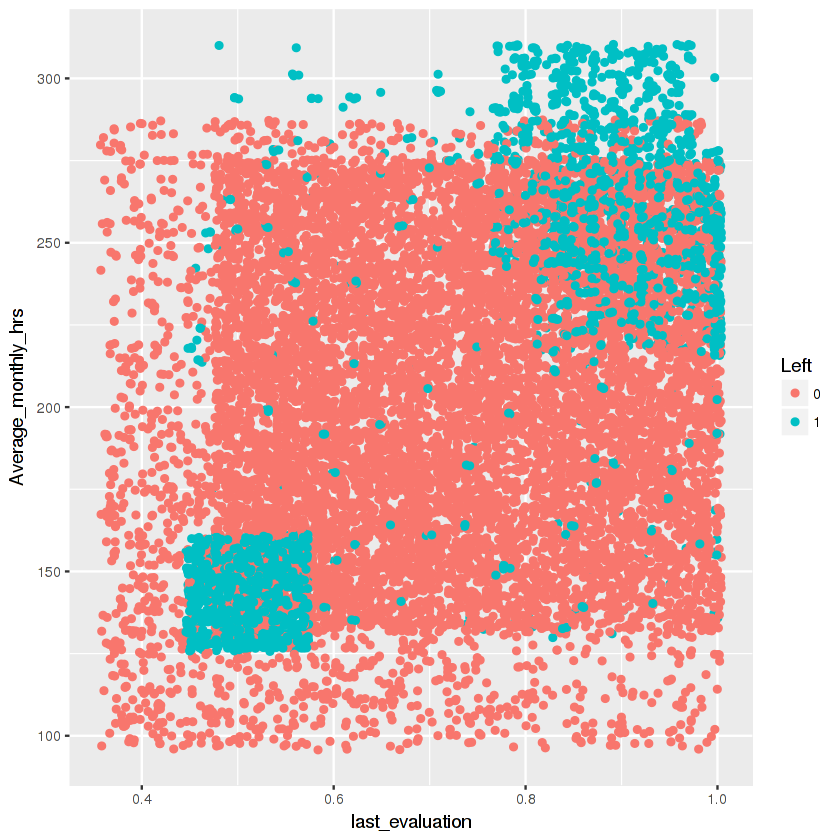

In [17]:
ggplot(df, aes(last_evaluation, average_montly_hours)) +
		geom_point(aes(color=factor(df$left)), position = 'jitter') + 
		xlab("last_evaluation") + ylab("Average_monthly_hrs") + labs(color="Left")

In [18]:
# Good news... No more plots!
# We can conclude that employees that are overworked and paid less will leave even after high evaluation.
# However there is a cluster of employees who are not overworked, are leaving as well (or were they fired?).
# The reason for this cannot be determined by existing data.